# **Import Library**

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
!pip install kneed
from kneed import KneeLocator
from sklearn.cluster import KMeans

# **Minimum Spanning Tree (MST) Clustering**

## **Load Dataset**

Id: Nomor identifikasi unik untuk setiap data bunga.
SepalLengthCm: Panjang kelopak bunga (sepal) dalam sentimeter (cm).
SepalWidthCm: Lebar kelopak bunga (sepal) dalam sentimeter (cm).
PetalLengthCm: Panjang mahkota bunga (petal) dalam sentimeter (cm).
PetalWidthCm: Lebar mahkota bunga (petal) dalam sentimeter (cm).
Species: Spesies bunga iris (contoh: Iris-setosa, Iris-versicolor, atau Iris-virginica).









In [50]:
# LOAD DATASETTT
url = "https://raw.githubusercontent.com/tfilushandy/DATASET-W10-TUGAS-PAK-GUNAWAN/refs/heads/main/Iris.csv"
df = pd.read_csv(url)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [51]:
# describe data
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [52]:
# info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [53]:
# Check for null values in the dataset
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


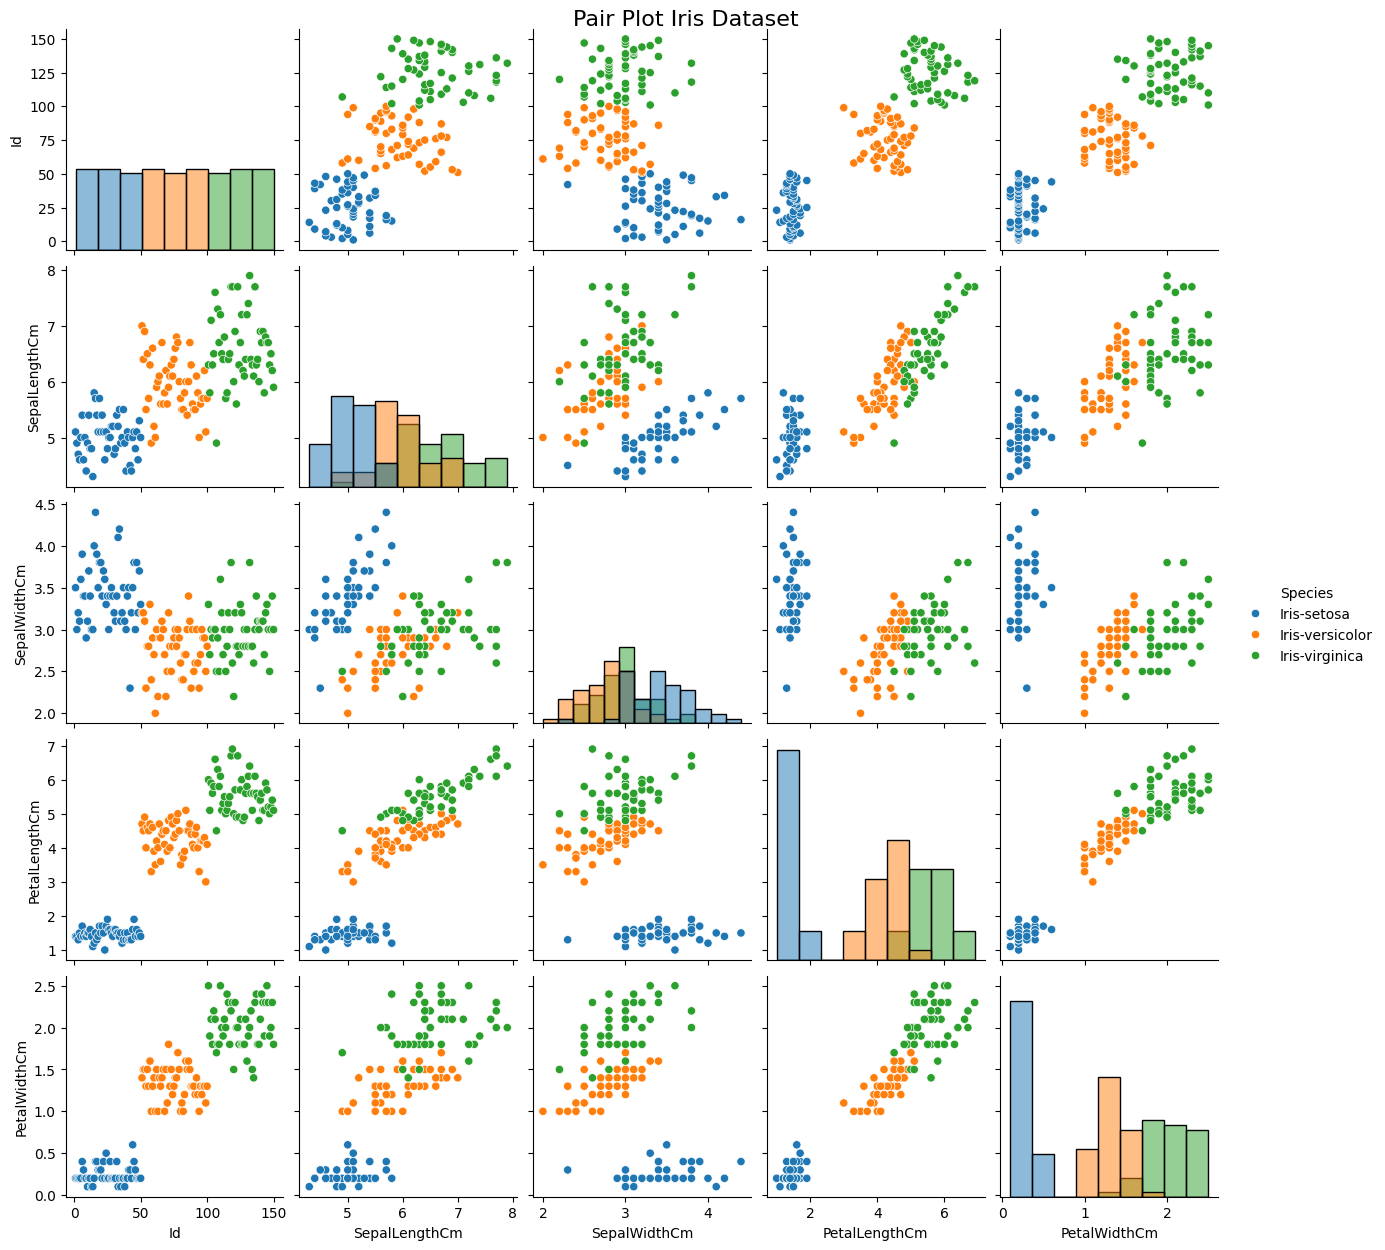

In [54]:
# Pairplot
sns.pairplot(df, hue='Species', diag_kind='hist')
plt.suptitle('Pair Plot Iris Dataset', y=1, fontsize=16)
plt.show()

## **Data Preprocessing**

In [55]:
# create new dataframe that consist only Kilotons of Co2 and Metric Tons Per Capita
df = df[['PetalLengthCm', 'PetalWidthCm']]
df.head()

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


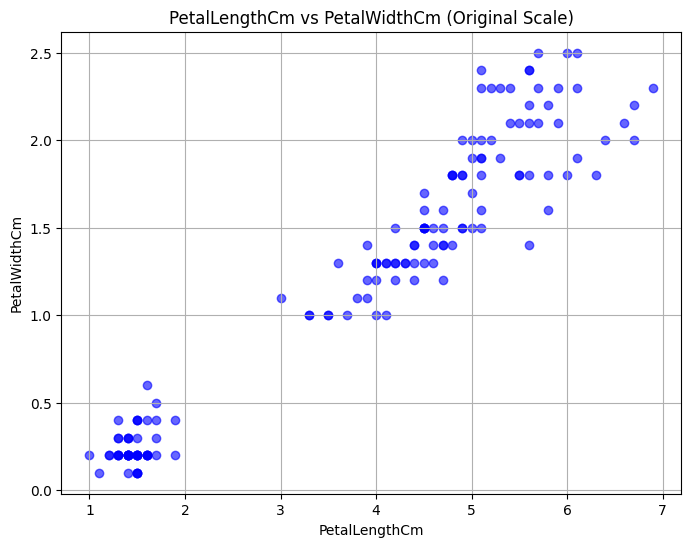

In [56]:
# Visualize the position using the original scale
plt.figure(figsize=(8, 6))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], color='blue', alpha=0.6)
plt.title("PetalLengthCm vs PetalWidthCm (Original Scale)")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.grid(True)
plt.show()

In [57]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df = pd.DataFrame(sc.fit_transform(df), columns=["PetalLengthCm", "PetalWidthCm"])
df.head()

,PetalLengthCm,PetalWidthCm
0,-1.341272,-1.312977
1,-1.341272,-1.312977
2,-1.398138,-1.312977
3,-1.284407,-1.312977
4,-1.341272,-1.312977


In [58]:
# get stastical information on the new dataset
df.describe()

,PetalLengthCm,PetalWidthCm
count,1.500000e+02,1.500000e+02
mean,3.315866e-16,-2.842171e-16
std,1.003350e+00,1.003350e+00
min,-1.568735e+00,-1.444450e+00
25%,-1.227541e+00,-1.181504e+00
50%,3.362659e-01,1.332259e-01
75%,7.627586e-01,7.905908e-01
max,1.786341e+00,1.710902e+00


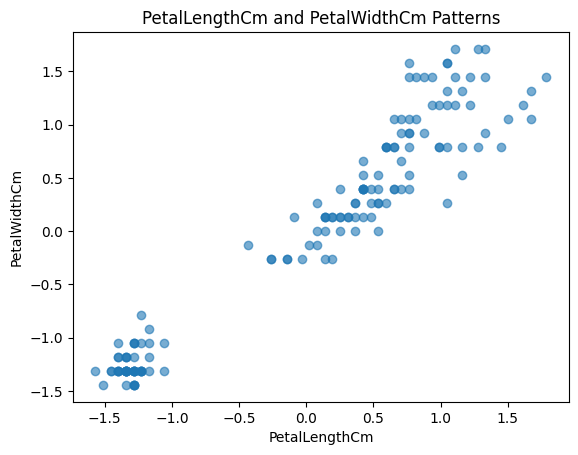

In [59]:
# Visualize the position
plt.scatter(df["PetalLengthCm"], df["PetalWidthCm"], alpha=0.6)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.title("PetalLengthCm and PetalWidthCm Patterns")
plt.show()

## **Clustering using K-Means**

In [60]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans

sse=[]
# check the inertia for each K
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

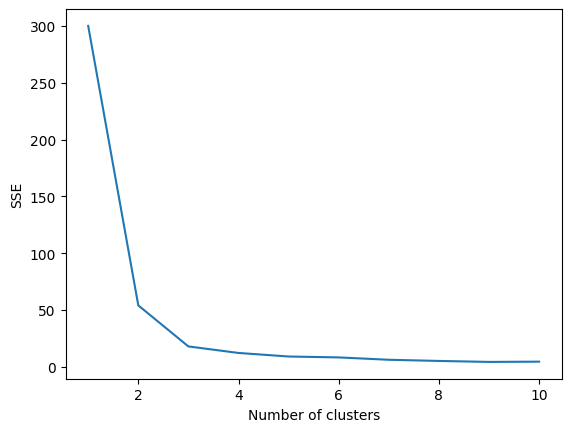

In [61]:
# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [62]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve="convex", direction="decreasing")
print("The best k for you model is", kneedle.elbow)

The best k for you model is 3


## **K-Means Algorithm**

In [63]:
# assign cluster with K-Means algorithm
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, init='random', max_iter=300, random_state=42)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

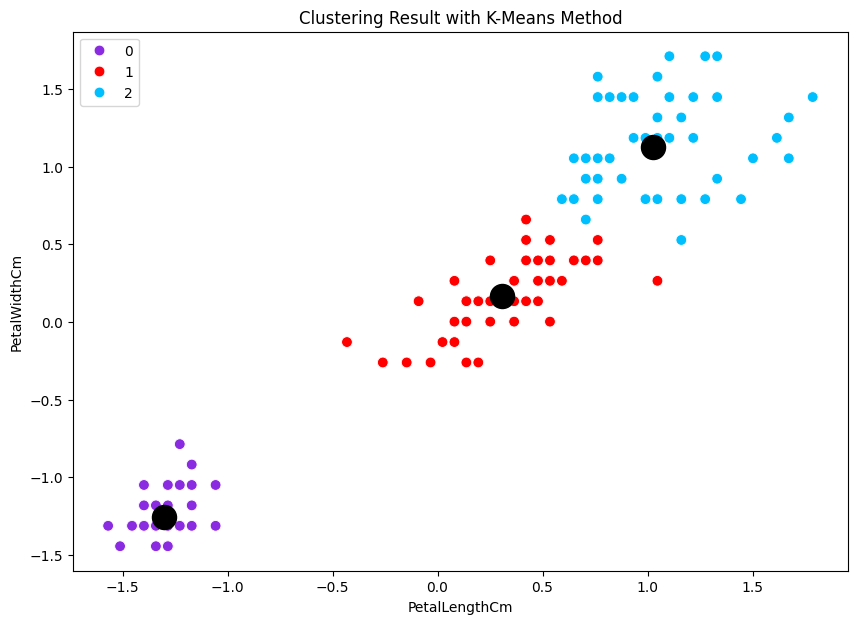

In [64]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue=y_pred, palette=["blueviolet", "red", "deepskyblue"], data=df, s = 60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [65]:
# Inverse transform the scaled data to get the original values
df_invers_kmeans = pd.DataFrame(sc.inverse_transform(df), columns=["PetalLengthCm", "PetalWidthCm"])

# Add the cluster labels to the original data
df_invers_kmeans['Cluster'] = y_pred

# analyze the clusters with the original values
df_invers_kmeans.head()

,PetalLengthCm,PetalWidthCm,Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


In [66]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df_invers_kmeans.groupby(y_pred).agg({'PetalLengthCm': ['mean', 'std', 'min', 'max'],
                                          'PetalWidthCm': ['mean', 'std', 'min', 'max']})

cluster_summary = cluster_summary.rename_axis('cluster')

cluster_summary

PetalLengthCm                     PetalWidthCm                    
                 mean       std  min  max         mean       std  min  max
cluster                                                                   
0            1.464000  0.173511  1.0  1.9      0.24400  0.107210  0.1  0.6
1            4.296154  0.505251  3.0  5.6      1.32500  0.185636  1.0  1.7
2            5.566667  0.549016  4.8  6.9      2.05625  0.242247  1.6  2.5

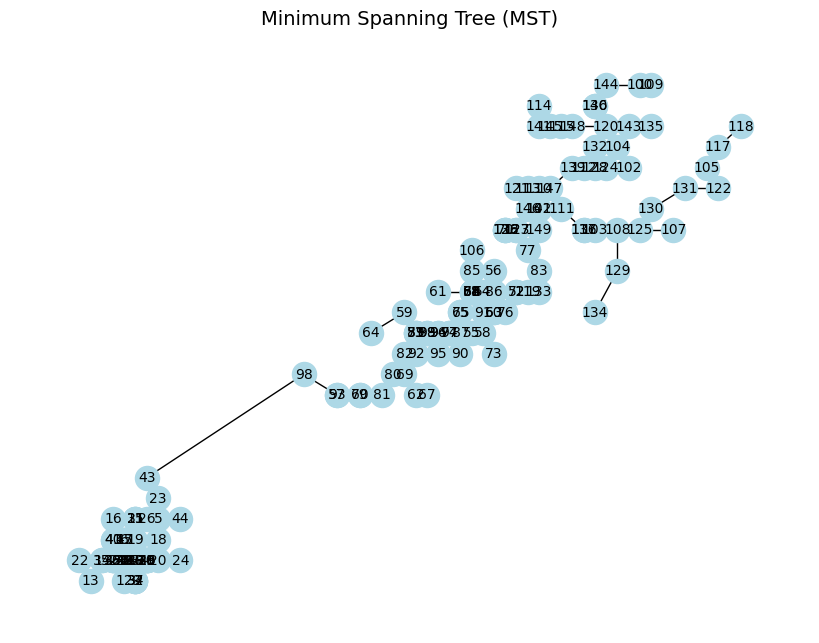

In [67]:
from scipy.spatial import distance_matrix
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.sparse as sp
import networkx as nx

# Membuat matriks jarak
dist_matrix = distance_matrix(df.values, df.values)

# Minimum Spanning Tree
graph = nx.from_numpy_array(dist_matrix)
mst = nx.minimum_spanning_tree(graph)

# Visualisasi MST
plt.figure(figsize=(8, 6))
pos = {i: df.iloc[i].values for i in range(len(df))}
nx.draw(mst, pos, with_labels=True, node_size=300, node_color='lightblue', font_size=10)
plt.title("MST", fontsize=14)
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.show()

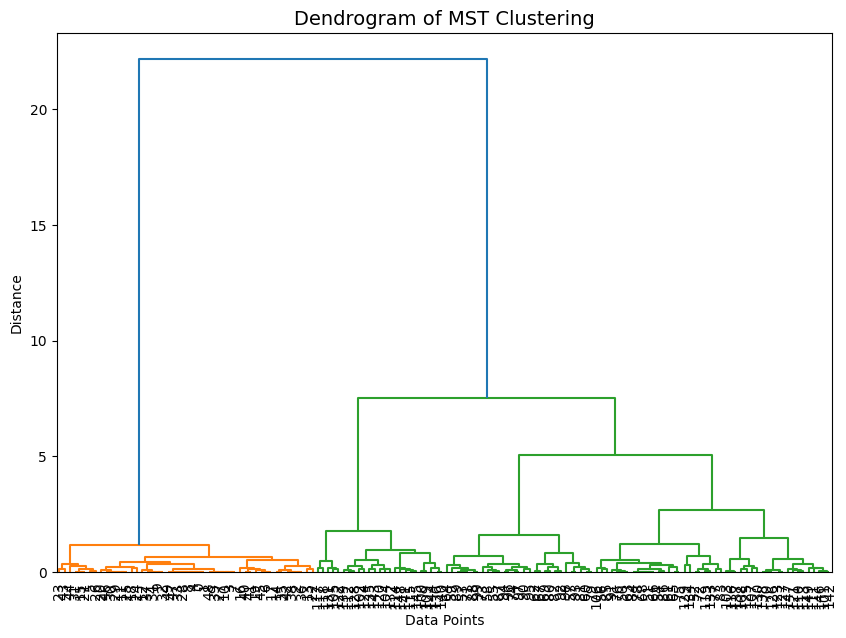

In [68]:
# Hierarchical Clustering menggunakan metode Ward
Z = linkage(df.values, method='ward')

In [ ]:
# Visualisasi dendrogram untuk menentukan jumlah kluster
plt.figure(figsize=(10, 7))
dendrogram(Z, labels=df.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram of MST Clustering", fontsize=14)
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

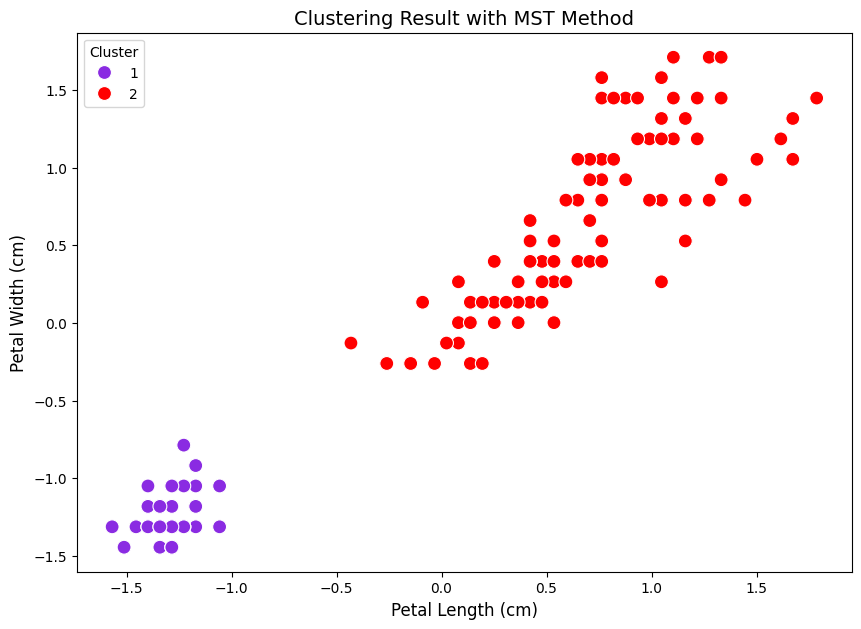

In [69]:
# Menentukan kluster berdasarkan dendrogram (t=2 diatur sesuai dendrogram)
df['MST_Cluster'] = fcluster(Z, t=2, criterion='maxclust')  # Misal jumlah kluster = 2

# Visualisasi hasil clustering berdasarkan MST
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue=df['MST_Cluster'],
                palette=["blueviolet", "red"], s=100, data=df)
plt.title("Clustering Result with MST Method", fontsize=14)
plt.xlabel("Petal Length (cm)", fontsize=12)
plt.ylabel("Petal Width (cm)", fontsize=12)
plt.legend(title="Cluster")
plt.show()

In [70]:
# Rangkuman untuk setiap kluster
cluster_summary = df.groupby('MST_Cluster').agg({
    'PetalLengthCm': ['mean', 'std', 'min', 'max'],
    'PetalWidthCm': ['mean', 'std', 'min', 'max']
})

# Menampilkan ringkasan hasil kluster
cluster_summary = cluster_summary.rename_axis("Cluster")
cluster_summary

PetalLengthCm                               PetalWidthCm            \
                 mean       std       min       max         mean       std   
Cluster                                                                      
1           -1.304878  0.098668 -1.568735 -1.056944    -1.255129  0.140952   
2            0.652439  0.469471 -0.431421  1.786341     0.627564  0.558456   

                             
              min       max  
Cluster                      
1       -1.444450 -0.787085  
2       -0.261193  1.710902